# **i. Import Libraries**


In [1]:
# Library for data manipulation and analysis
import pandas as pd
import numpy as np

from datetime import datetime
import datetime as dt

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for statistical analysis
from scipy import stats

# Libraries for data preprocessing and analysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# For creating Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

# Library for outlier handling
from feature_engine.outliers import Winsorizer

# Saving model
import pickle

# Membuat pipeline
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

Mengimport banyak library dan mengumpulkan code tersebut dalam satu cell bertujuan untuk mengefisiensikan baris code dan menghindari pengulangan import library pada saat menggunakan library yang sama.


# **ii. Data Loading**


Dataset yang digunakan merupakan dataset yang diambil kaggle dan telah diformat ke file csv. Dataset dapat diakses melalui [link](https://www.kaggle.com/datasets/shashwatwork/ecommerce-data) berikut


In [2]:
df = pd.read_csv('ecommerce_data_cleaned1.csv')

Dataset yang telah diubah menjadi csv lalu diimport menggunakan library pandas dan dijadikan suatu dataframe berbentuk tabel


# **iii. Exploratory Data Analysis**


Kita akan melakukan eksplorasi data analisis guna memahami data, mengidentifikasi masalah yang ditemui dan melakukan persiapan awal untuk dianalisis lebih lanjut.


## A. Problem Overview


Latar Belakang:

Dalam era bisnis yang semakin kompetitif, perusahaan perlu memiliki pemahaman yang mendalam tentang pelanggan mereka untuk memaksimalkan efisiensi pemasaran dan meningkatkan kepuasan pelanggan. Masalah utama yang dihadapi adalah bagaimana mengidentifikasi dan mengelompokkan pelanggan dengan tepat. Sebagai solusi, perusahaan perlu mengimplementasikan strategi segmentasi pelanggan yang efisien. Oleh karena itu, tujuan utama adalah meningkatkan pendapatan sebesar 5% dalam waktu 6 bulan dengan menciptakan kampanye pemasaran yang efektif dan efisien berdasarkan hasil dari segmentasi pelanggan. Dengan jawaban atas pertanyaan ini, perusahaan akan dapat mengembangkan kampanye pemasaran yang lebih terfokus, menyesuaikan produk dan layanan dengan kebutuhan pelanggan, serta meningkatkan retensi pelanggan. Dengan demikian, ini akan membantu perusahaan untuk tetap kompetitif dan berkelanjutan dalam jangka panjang.

Problem statement:

Meningkatkan revenue sebesar (5%) dalam waktu 6 bulan dengan menciptakan campaign marketing yang efektif dan efisien berdasarkan hasil dari segmentasi customer

Objectives: 

Tujuan dari proyek ini adalah mengidentifikasi dan mengelompokkan pelanggan dengan efisien berdasarkan perilaku, preferensi, dan karakteristik mereka.





## B. Data Understanding

Langkah ini dilakukan guna memahami data dan pengecekan pola yang ada pada dataframe seperti pengecekan nama dan jumlah kolom, pengecekan missing value, pengecekan data duplikat dan lain-lain


In [3]:
# Show top 5 data of dataset
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,customer_id,customer_name,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,5,46,4,Medium,LS-001,Lane Daniels,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,3,112,11,Medium,IZ-002,Alvarado Kriz,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,1,31,3,Critical,EN-003,Moon Weien,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,5,26,2,High,AN-004,Sanchez Bergman,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,4,160,16,Critical,ON-005,Rowe Jackson,Townsville,Queensland,Australia,Oceania,Jul


Menampilkan 5 data teratas sesuai index dari dataframe


In [4]:
# Show latest 5 data of dataset
df.tail()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,customer_id,customer_name,city,state,country,region,months
51270,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,4,17,1,Medium,IN-0040977,Welch Fein,Pasadena,Texas,United States,Central,Jan
51271,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,3,2,0,Medium,TT-0040978,Martinez Arnett,Harare,Harare,Zimbabwe,Africa,Jun
51272,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,5,0,0,Medium,ON-0040979,Mccoy Duston,Townsville,Queensland,Australia,Oceania,Jan
51273,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,4,28,2,Medium,RN-0040980,Bentley Zypern,Houston,Texas,United States,Central,Dec
51274,FA-2015-30775,2015-12-01,2015-12-06,5,Standard Class,Fashion,Sports Wear,85,3,3,28,2,Medium,RZ-0040981,Mcclure Schwarz,Valinhos,São Paulo,Brazil,South,Dec


Menampilkan 5 data terakhir sesuai index dari dataframe


In [5]:
#Show basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51275 entries, 0 to 51274
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          51275 non-null  object
 1   order_date        51275 non-null  object
 2   ship_date         51275 non-null  object
 3   aging             51275 non-null  int64 
 4   ship_mode         51275 non-null  object
 5   product_category  51275 non-null  object
 6   product           51275 non-null  object
 7   sales             51275 non-null  int64 
 8   quantity          51275 non-null  int64 
 9   discount          51275 non-null  int64 
 10  profit            51275 non-null  int64 
 11  shipping_cost     51275 non-null  int64 
 12  order_priority    51275 non-null  object
 13  customer_id       51275 non-null  object
 14  customer_name     51275 non-null  object
 15  city              51275 non-null  object
 16  state             51275 non-null  object
 17  country     

Menampilkan informasi dasar mengenai dataframe seperti nama kolom, tipe data dan lain-lain


In [6]:
# Show shape of dataframe
df.shape

(51275, 20)

Menampilkan ukuran tabel yang mempunyai 51275 baris dan 20 kolom


In [7]:
# Show name of all columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'customer_id',
       'customer_name', 'city', 'state', 'country', 'region', 'months'],
      dtype='object')

Menampilkan nama kolom secara keseluruhan


In [8]:
# # Select numeric columns
numeric = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
object = df.select_dtypes(include=['object']).columns

In [9]:
# Define variable
num = numeric.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data numerikal adalah :", num, "kolom", "\n","\n", numeric)

Jumlah kolom yang bertipe data numerikal adalah : 6 kolom 
 
 Index(['aging', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost'], dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data numerical

In [10]:
# Define variable
obj = object.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data object adalah :",obj, "kolom", "\n","\n",object)

Jumlah kolom yang bertipe data object adalah : 14 kolom 
 
 Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'product_category',
       'product', 'order_priority', 'customer_id', 'customer_name', 'city',
       'state', 'country', 'region', 'months'],
      dtype='object')


Menampilkan jumlah kolom dan nama kolom secara keseluruhan yang bertipe data numerical

In [11]:
# Check duplicate rows
df.duplicated().sum()

0

In [12]:
# Check missing value
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
aging               0
ship_mode           0
product_category    0
product             0
sales               0
quantity            0
discount            0
profit              0
shipping_cost       0
order_priority      0
customer_id         0
customer_name       0
city                0
state               0
country             0
region              0
months              0
dtype: int64

Mengecek missing value pada dataframe. Ditemukan bahwa tidak ada missing value pada dataset.

In [13]:
# Showing descriptive statistics for numeric columns
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
aging,51275.0,5.255251,2.960023,1.0,3.0,5.0,8.0,10.0
sales,51275.0,156.428025,65.780266,33.0,109.0,159.0,218.0,250.0
quantity,51275.0,2.997270,1.413356,1.0,2.0,3.0,4.0,5.0
discount,51275.0,2.997192,1.411450,1.0,2.0,3.0,4.0,5.0
profit,51275.0,72.322535,49.097917,0.0,25.0,67.0,120.0,167.0
shipping_cost,51275.0,6.831068,4.915101,0.0,2.0,6.0,12.0,16.0


Mengecek ringkasan statistik seperti nilai rata-rata, nilai minimum dan maksimum pada data yang bertipe numerical

In [14]:
# Returns the number of unique values ​​in each column of data_raw
df.nunique()

order_id            51275
order_date            365
ship_date             375
aging                  10
ship_mode               4
product_category        4
product                42
sales                  39
quantity                5
discount                5
profit                154
shipping_cost          17
order_priority          4
customer_id         51275
customer_name         795
city                 3636
state                1094
country               147
region                 13
months                 12
dtype: int64

Menampilkan jumlah unik value yang ada di setiap kolom.

# **iv. RFM Metrics**


In [15]:
# Convert 'order_date' and 'ship_date' columns to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

Mengubah tipe data kolom order_date dan ship_date menjadi tipe data yang sesuai yaitu datetime

In [16]:
# Create a new column 'id_name' by transforming 'customer_name' using the first 'customer_id' for each customer
df['id_name'] = df.groupby('customer_name')['customer_id'].transform('first')

Membuat kolom baru yaitu id_name yang berasal dari mengelompokkan customer_id sesuai dengan customer_name nya

In [17]:
# Encode 'customer_name' using LabelEncoder and store the result in the 'id_name' column
LE = LabelEncoder()
df['id_name'] = LE.fit_transform(df['id_name'])

Melakukan proses encoding terhadap kolom id_name agar kolom tersebut bertipe data numerical.

In [18]:
# Calculate the last date in the data
last_date = df['ship_date'].max()

# Calculate recency based on 'ship_date' and group by 'id_name'
recency_data = df.groupby('id_name')['ship_date'].max().reset_index()
recency_data['recency'] = (last_date - recency_data['ship_date']).dt.days

Dalam proses ini, kode menghitung recency untuk setiap pelanggan dengan mencari tanggal pengiriman maksimum dalam dataset, menguranginya dari tanggal pengiriman setiap pelanggan, dan kemudian mengelompokkan hasilnya berdasarkan 'id_name' untuk mendapatkan nilai recency untuk setiap pelanggan.

In [19]:
# Set a reference date (NOW) to January 31, 2016
NOW = dt.date(2016, 1, 31)

Proses ini mengatur tanggal referensi (NOW) ke tanggal 31 Januari 2016.

In [20]:
# Create a new column 'date' containing only the date part from the 'ship_date' column
df['date'] = pd.DatetimeIndex(df['ship_date']).date

Ini adalah proses pembuatan kolom baru bernama 'date' yang berisi bagian tanggal saja dari kolom 'ship_date'. Data tanggal ini diambil dari kolom 'ship_date' dengan menggunakan fungsi `pd.DatetimeIndex(df['ship_date']).date`, sehingga hanya tanggalnya yang disimpan dalam kolom 'date'.

In [21]:
# Calculate recency using 'ship_date' and group by 'id_name'
df_recency = df.groupby(['id_name'], as_index=False)['date'].max()
df_recency.columns = ['id_name', 'last_date']

Ini adalah proses perhitungan nilai recency (seberapa baru atau lama pelanggan melakukan pembelian terakhir) menggunakan kolom 'ship_date'. Data dihitung berdasarkan setiap 'id_name' yang ada dalam dataset. Hasil perhitungan ini disimpan dalam DataFrame baru bernama 'df_recency' yang memiliki dua kolom, yaitu 'id_name' dan 'last_date', yang menunjukkan tanggal terbaru saat pelanggan terakhir kali melakukan pembelian.

In [22]:
# Calculate the 'Recency' column by subtracting 'last_date' from the reference date (NOW) and getting the number of days
df_recency['Recency'] = df_recency.last_date.apply(lambda x: (NOW - x).days)

Proses ini menghitung kolom 'Recency' dengan cara mengurangkan 'last_date' (tanggal terbaru pembelian) dari tanggal referensi 'NOW' (yang telah ditetapkan sebelumnya ke tanggal 31 Januari 2016) dan kemudian mengonversi hasilnya menjadi jumlah hari. Hasil perhitungan ini akan memberikan informasi seberapa "segar" atau "lama" pembelian terakhir setiap pelanggan dalam jumlah hari.

In [23]:
# Drop the 'last_date' column from the df_recency DataFrame
df_recency.drop(columns=['last_date'], inplace=True)

Proses ini menghapus kolom 'last_date' dari DataFrame 'df_recency'. Kolom 'last_date' sudah tidak diperlukan setelah perhitungan 'Recency' selesai dilakukan, jadi kolom tersebut dihapus agar hanya tersisa kolom 'id_name' dan 'Recency' dalam DataFrame 'df_recency'.

In [24]:
# Grouping by 'id_name' and aggregating based on 'order_id' and 'sales'
FM_Table = df.groupby('id_name').agg({'order_id': 'count', 'sales': 'sum'})

# Renaming the columns
FM_Table.rename(columns={'order_id': 'Frequency', 'sales': 'Monetary_Value'}, inplace=True)

# Displaying the first few rows of the modified table
FM_Table.head()

,Frequency,Monetary_Value
id_name,,
0,58,8960
1,45,7840
2,49,7747
3,52,8070
4,62,9489


Proses ini melakukan pengelompokan data berdasarkan kolom 'id_name', kemudian menghitung frekuensi masing-masing 'id_name' dengan menghitung jumlah unik 'order_id' dan menghitung nilai total penjualan ('sales') untuk setiap 'id_name'. Hasilnya, DataFrame 'FM_Table' berisi kolom 'Frequency' yang berisi frekuensi, dan kolom 'Monetary_Value' yang berisi total nilai penjualan. Selanjutnya, kolom-kolom ini diubah nama menjadi 'Frequency' dan 'Monetary_Value'. Hasilnya, DataFrame 'FM_Table' akan menampilkan beberapa baris pertama dari tabel yang sudah dimodifikasi.

In [25]:
# Merge the recency and FM_Table DataFrames on 'id_name'
RFM_Table = df_recency.merge(FM_Table, left_on='id_name', right_on='id_name')
RFM_Table.head()

,id_name,Recency,Frequency,Monetary_Value
0,0,36,58,8960
1,1,41,45,7840
2,2,26,49,7747
3,3,38,52,8070
4,4,22,62,9489


Proses ini menggabungkan dua DataFrames, yaitu 'df_recency' dan 'FM_Table', berdasarkan kolom 'id_name'. Hasilnya adalah DataFrame baru yang disebut 'RFM_Table' yang berisi informasi tentang recency, frequency, dan monetary value untuk setiap 'id_name'. Dalam contoh ini, kita melihat beberapa baris pertama dari 'RFM_Table' yang sudah digabungkan.

In [26]:
# Display summary statistics of RFM_Table
RFM_Table.describe()

,id_name,Recency,Frequency,Monetary_Value
count,795.000000,795.000000,795.000000,795.000000
mean,397.000000,30.339623,64.496855,10089.115723
std,229.641024,6.490480,13.437641,2203.510532
min,0.000000,21.000000,29.000000,4249.000000
25%,198.500000,26.000000,55.000000,8554.500000
50%,397.000000,29.000000,64.000000,10006.000000
75%,595.500000,33.000000,74.000000,11552.500000
max,794.000000,69.000000,108.000000,17015.000000


Ini adalah statistik ringkasan dari 'RFM_Table'. Statistik ini memberikan informasi tentang jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama, median (kuartil kedua), kuartil ketiga, dan nilai maksimum untuk kolom 'Recency', 'Frequency', dan 'Monetary_Value'. Data ini membantu kita memahami distribusi dan sebaran nilai-nilai di dalam DataFrame 'RFM_Table'.

In [27]:
# Calculate quantiles for segmentation
quantiles = RFM_Table.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

Kode ini menghitung kuartil dari DataFrame 'RFM_Table'. Kuartil adalah nilai-nilai yang membagi data menjadi empat bagian yang sama besar. Dalam kode ini, kita menghitung tiga kuartil: kuartil pertama (25%), kuartil kedua (50% atau median), dan kuartil ketiga (75%).

Hasil perhitungan kuartil disimpan dalam bentuk kamus (dictionary) dengan tiga kunci, yaitu 'Recency', 'Frequency', dan 'Monetary_Value'. Setiap kunci memiliki nilai-nilai kuartil yang sesuai. Kode ini akan berguna nanti saat kita melakukan segmentasi data berdasarkan kriteria tertentu, seperti 'Recency' yang rendah, 'Frequency' yang tinggi, atau 'Monetary_Value' yang tinggi.

In [28]:
# Create a copy of the RFM_Table
segmented_rfm = RFM_Table.copy()

Kode ini membuat salinan (copy) dari DataFrame 'RFM_Table' dan menyimpannya dalam variabel 'segmented_rfm'. Dengan melakukan salinan ini, kita dapat bekerja dengan DataFrame yang berbeda tanpa memengaruhi atau merusak data asli yang ada dalam 'RFM_Table'. Ini berguna jika kita ingin melakukan segmentasi atau analisis tambahan pada data tanpa mengubah data utama.

In [29]:
# Define a function to calculate the Recency score
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

Kode ini mendefinisikan sebuah fungsi yang disebut `RScore` untuk menghitung skor Recency berdasarkan parameter yang diberikan. Fungsi ini memiliki tiga parameter:

1. `x`: Ini adalah nilai Recency yang ingin dihitung skornya.
2. `p`: Ini adalah nama kolom yang digunakan untuk mengambil nilai kuantil (dalam hal ini, kolom Recency).
3. `d`: Ini adalah dictionary yang berisi kuantil-kuantil yang telah dihitung sebelumnya untuk kolom Recency.

Fungsi ini bekerja dengan menguji nilai `x` terhadap kuantil-kuantil yang ada dalam dictionary `d`. Berdasarkan nilai `x` dan kuantil, fungsi akan mengembalikan skor Recency yang berkisar antara 1 hingga 4. Skor ini digunakan dalam proses segmentasi pelanggan berdasarkan Recency.

In [30]:
# Define a function to calculate the Frequency and Monetary Value scores
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

Kode ini mendefinisikan sebuah fungsi yang disebut `FMScore` untuk menghitung skor Frequency (Frekuensi) dan Monetary Value (Nilai Moneter) berdasarkan parameter yang diberikan. Fungsi ini memiliki tiga parameter yang mirip dengan fungsi sebelumnya:

1. `x`: Ini adalah nilai Frequency atau Monetary Value yang ingin dihitung skornya.
2. `p`: Ini adalah nama kolom yang digunakan untuk mengambil nilai kuantil (dalam hal ini, kolom Frequency atau Monetary Value).
3. `d`: Ini adalah dictionary yang berisi kuantil-kuantil yang telah dihitung sebelumnya untuk kolom Frequency atau Monetary Value.

Fungsi `FMScore` ini juga bekerja dengan menguji nilai `x` terhadap kuantil-kuantil yang ada dalam dictionary `d`. Berdasarkan nilai `x` dan kuantil, fungsi akan mengembalikan skor Frequency atau Monetary Value yang berkisar antara 1 hingga 4. Skor ini digunakan dalam proses segmentasi pelanggan berdasarkan Frequency dan Monetary Value.

In [31]:
# Apply the R_Score, F_Score, and M_Score functions to calculate scores for each segment
segmented_rfm['R_Score'] = segmented_rfm['Recency'].apply(RScore, args=('Recency', quantiles))
segmented_rfm['F_Score'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles))
segmented_rfm['M_Score'] = segmented_rfm['Monetary_Value'].apply(FMScore, args=('Monetary_Value', quantiles))
segmented_rfm.head()

,id_name,Recency,Frequency,Monetary_Value,R_Score,F_Score,M_Score
0,0,36,58,8960,4,3,3
1,1,41,45,7840,4,4,4
2,2,26,49,7747,1,4,4
3,3,38,52,8070,4,4,4
4,4,22,62,9489,1,3,3


Kode ini menunjukkan tabel yang menggambarkan berbagai atribut pelanggan (seperti Recency, Frequency, dan Monetary Value) serta skor yang dihasilkan berdasarkan pemrosesan sebelumnya.

Setiap baris dalam tabel tersebut mewakili satu pelanggan atau ID pelanggan (kolom 'id_name'). Beberapa kolom yang ditampilkan dalam tabel ini adalah:

- 'Recency': Menunjukkan berapa hari yang telah berlalu sejak pelanggan terakhir melakukan pembelian (dihitung dari tanggal referensi).
- 'Frequency': Menunjukkan berapa kali pelanggan melakukan pembelian (dihitung sebagai jumlah pesanan).
- 'Monetary_Value': Menunjukkan total nilai pembelian yang dilakukan oleh pelanggan.
- 'R_Score': Merupakan skor Recency yang dihitung berdasarkan kuantil untuk Recency.
- 'F_Score': Merupakan skor Frequency yang dihitung berdasarkan kuantil untuk Frequency.
- 'M_Score': Merupakan skor Monetary Value yang dihitung berdasarkan kuantil untuk Monetary Value.

Skor-skor ini digunakan dalam proses segmentasi pelanggan berdasarkan nilai Recency, Frequency, dan Monetary Value. Misalnya, pelanggan dengan 'R_Score' yang lebih rendah dan 'F_Score' yang lebih tinggi mungkin dianggap sebagai pelanggan yang lebih aktif dan baru-baru ini melakukan pembelian.

In [32]:
# Calculate the RFM Score by summing up R_Score, F_Score, and M_Score
segmented_rfm['RFM_Score'] = segmented_rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
segmented_rfm.head()

,id_name,Recency,Frequency,Monetary_Value,R_Score,F_Score,M_Score,RFM_Score
0,0,36,58,8960,4,3,3,10
1,1,41,45,7840,4,4,4,12
2,2,26,49,7747,1,4,4,9
3,3,38,52,8070,4,4,4,12
4,4,22,62,9489,1,3,3,7


Kode ini menghitung RFM Score untuk setiap pelanggan dengan cara menjumlahkan skor Recency (R_Score), skor Frequency (F_Score), dan skor Monetary Value (M_Score) untuk setiap pelanggan.

Hasilnya adalah kolom baru yang disebut 'RFM_Score', yang memberikan nilai total dari ketiga skor tersebut. Skor ini dapat digunakan untuk membagi pelanggan ke dalam segmen-segmen berdasarkan perilaku pembelian mereka. Semakin tinggi RFM Score, semakin baik perilaku pembelian pelanggan tersebut.

In [33]:
# Group the data by RFM Score and calculate mean Recency, Frequency, Monetary Value, and count
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary_Value': ['mean', 'count']
}).round(1)

Recency Frequency Monetary_Value      
             mean      mean           mean count
RFM_Score                                       
3            24.0      84.0        13260.2    65
4            27.1      80.8        12682.8    54
5            27.8      75.0        11935.4    91
6            30.6      72.7        11497.0    84
7            28.5      65.7        10166.6   104
8            30.5      62.3         9667.6   111
9            29.3      54.3         8497.7    84
10           33.7      53.4         8265.7    87
11           34.5      49.1         7587.0    65
12           40.2      47.5         7313.6    50

Kode ini mengelompokkan data berdasarkan RFM Score (poin gabungan dari Recency, Frequency, dan Monetary Value) dan kemudian menghitung nilai rata-rata Recency, Frequency, Monetary Value, serta jumlah pelanggan dalam setiap kelompok RFM Score.

Hasilnya adalah sebuah DataFrame yang berisi informasi berikut untuk setiap kelompok RFM Score:

- `Recency`: Nilai rata-rata Recency (lama waktu sejak pembelian terakhir).
- `Frequency`: Nilai rata-rata Frequency (jumlah pembelian atau transaksi).
- `Monetary_Value`: Nilai rata-rata Monetary Value (total nilai pembelian).
- `count`: Jumlah pelanggan dalam kelompok tersebut.

Data ini membantu dalam memahami karakteristik dari setiap segmen pelanggan berdasarkan RFM Score mereka.

In [34]:
# Define a function to check skewness and visualize the distribution
def check_skew(df_skew, column):
    # Calculate the skewness
    skew = stats.skew(df_skew[column])
    # Perform a skewness test
    skewtest = stats.skewtest(df_skew[column])
    
    # Create a title for the plot
    plt.title('Distribution of ' + column)
    
    # Plot the distribution using seaborn
    sns.distplot(df_skew[column])
    
    # Print the skewness and skewness test result
    print("{}'s Skew: {}, Skewtest: {}".format(column, skew, skewtest))
    
    return


Kode ini mendefinisikan sebuah fungsi bernama `check_skew` yang digunakan untuk memeriksa skewness (ketidaksimetrian) dalam distribusi data pada kolom tertentu dalam DataFrame. Berikut adalah penjelasan lebih rinci:

- `df_skew`: Parameter pertama adalah DataFrame yang akan digunakan untuk memeriksa skewness.
- `column`: Parameter kedua adalah nama kolom di dalam DataFrame yang akan dianalisis untuk skewness.

Fungsi ini melakukan hal-hal berikut:
1. Menghitung skewness dari data dalam kolom yang diberikan.
2. Melakukan pengujian skewness menggunakan fungsi `skewtest` dari modul `stats` dalam pustaka SciPy.
3. Membuat plot distribusi data menggunakan pustaka Seaborn dengan `sns.distplot`.
4. Menampilkan judul plot yang mencakup nama kolom yang sedang dianalisis.
5. Mencetak nilai skewness dan hasil pengujian skewness ke layar dengan format yang sesuai.

Fungsi ini membantu untuk memvisualisasikan distribusi data dalam kolom tertentu dan memberikan informasi tentang seberapa simetris atau asimetris distribusi tersebut.

Recency's Skew: 1.4689482614620322, Skewtest: SkewtestResult(statistic=12.868197515954948, pvalue=6.796985076152881e-38)
Frequency's Skew: 0.19539263075835564, Skewtest: SkewtestResult(statistic=2.2493355333480984, pvalue=0.024491156733591073)
Monetary_Value's Skew: 0.23975042009678252, Skewtest: SkewtestResult(statistic=2.747680114354591, pvalue=0.006001853354976952)


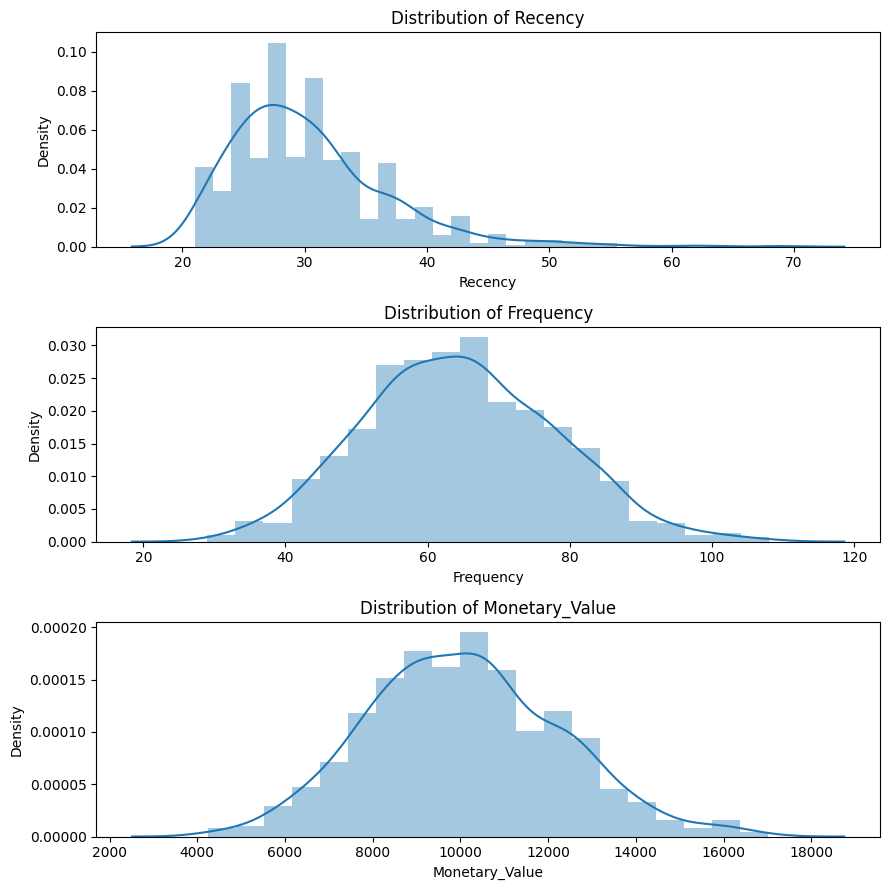

In [35]:
# Create a 3x1 subplot
plt.figure(figsize=(9, 9))

# Plot the first subplot for 'Recency'
plt.subplot(3, 1, 1)
check_skew(RFM_Table, 'Recency')

# Plot the second subplot for 'Frequency'
plt.subplot(3, 1, 2)
check_skew(RFM_Table, 'Frequency')

# Plot the third subplot for 'Monetary_Value'
plt.subplot(3, 1, 3)
check_skew(RFM_Table, 'Monetary_Value')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Kode ini digunakan untuk membuat tiga subplot dalam satu gambar (figure) menggunakan modul Matplotlib. Setiap subplot memvisualisasikan skewness dan distribusi data dari tiga kolom yang berbeda dalam DataFrame RFM_Table, yaitu 'Recency', 'Frequency', dan 'Monetary_Value'. 

Hasilnya, akan terlihat tiga subplot yang berbeda, masing-masing menggambarkan distribusi data dari tiga kolom yang berbeda ('Recency', 'Frequency', dan 'Monetary_Value'). Skewness dan hasil pengujian skewness (p-value) juga dicetak di bawah masing-masing subplot.

In [36]:
# Create a copy of RFM_Table and apply a logarithmic transformation to it
df_rfm_log = RFM_Table.copy()
df_rfm_log = np.log(df_rfm_log + 1)
df_rfm_log

,id_name,Recency,Frequency,Monetary_Value
0,0.000000,3.610918,4.077537,9.100637
1,0.693147,3.737670,3.828641,8.967122
2,1.098612,3.295837,3.912023,8.955190
3,1.386294,3.663562,3.970292,8.996033
4,1.609438,3.135494,4.143135,9.157994
...,...,...,...,...
790,6.673298,3.218876,4.127134,9.131297
791,6.674561,3.332205,3.610918,8.581107
792,6.675823,3.433987,3.784190,8.780480
793,6.677083,3.367296,4.553877,9.669915


Kode tersebut membuat salinan dari DataFrame `RFM_Table` dan menerapkan transformasi logaritmik padanya. Ini dilakukan untuk mengurangi pengaruh nilai ekstrem dan membuat data lebih cocok untuk analisis atau pemodelan tertentu.

Recency's Skew: 0.7239298911102102, Skewtest: SkewtestResult(statistic=7.595623625137948, pvalue=3.0631363796319546e-14)


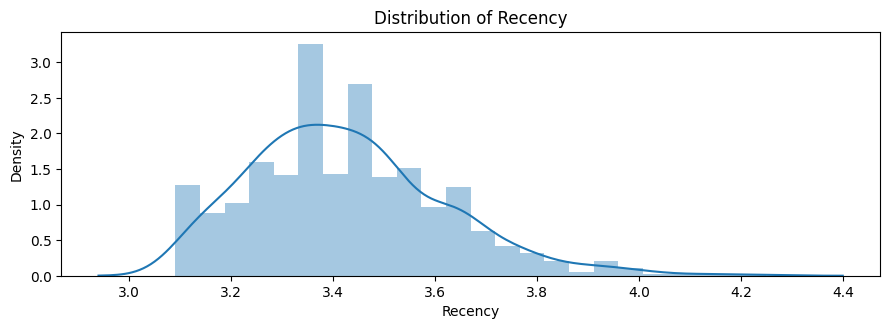

In [37]:
# Create a 3x1 subplot
plt.figure(figsize=(9, 9))

# Plot the first subplot for 'Recency' after applying the log transformation
plt.subplot(3, 1, 1)
check_skew(df_rfm_log, 'Recency')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Kode di atas membuat tiga subplot dalam satu gambar (3x1). Subplot pertama menggambarkan distribusi kolom 'Recency' setelah menerapkan transformasi logaritmik. Ini membantu memeriksa dan memvisualisasikan perubahan dalam distribusi data setelah transformasi logaritmik diterapkan. Hal ini berguna untuk menilai apakah transformasi tersebut berhasil mengurangi skewness atau tidak dalam data 'Recency'. Subplot lainnya untuk 'Frequency' dan 'Monetary_Value' tidak digunakan dalam kode ini.

In [38]:
# Instantiate the Winsorizer to handle outliers in 'Recency' using the IQR method
windsoriser = Winsorizer(capping_method='iqr', 
                         tail='both',  # cap left, right, or both tails
                         fold=2,
                         variables=['Recency']
                        )

# Fit the Winsorizer to the log-transformed data
windsorised_data = windsoriser.fit_transform(df_rfm_log)

 Kita telah mengatasi outlier dalam kolom 'Recency' dengan menggunakan metode Winsorizing berdasarkan IQR (Interquartile Range). Proses ini bertujuan untuk memastikan bahwa distribusi data 'Recency' lebih stabil dan tidak dipengaruhi oleh nilai-nilai outlier yang mungkin menjadi sumber ketidakstabilan dalam analisis data. Dengan menghapus atau mengatasi outlier, kita dapat lebih akurat menganalisis dan memodelkan data serta menghindari bias yang mungkin muncul akibat kehadiran outlier. Hal ini membantu meningkatkan kualitas analisis dan pemahaman kita terhadap pola data yang sebenarnya.

In [39]:
# Instantiate a StandardScaler
scaler = StandardScaler()

# Fit the scaler to the log-transformed data
scaler.fit(df_rfm_log)

# Transform the data using the fitted scaler
RFM_Table_scaled = scaler.transform(df_rfm_log)

Kode tersebut digunakan untuk melakukan standardization atau penskalaan data pada dataframe yang telah mengalami transformasi log. StandardScaler adalah suatu teknik yang digunakan untuk mengubah data sehingga memiliki rata-rata nol dan deviasi standar satu. Pada kode ini, StandardScaler pertama-tama di-fit atau disesuaikan dengan data yang telah di-transformasi log. Selanjutnya, data di-transform ulang menggunakan scaler yang sudah di-fit, sehingga semua variabel dalam dataframe memiliki skala yang serupa dan sesuai dengan persyaratan beberapa model machine learning, seperti K-Means. Dengan melakukan standardization ini, kita dapat memperlakukan setiap variabel dengan adil dalam proses pemodelan, sehingga hasil analisis dan prediksi menjadi lebih konsisten dan akurat.

In [40]:
# Create a DataFrame from the scaled data with column names
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)

# Display the scaled DataFrame
RFM_Table_scaled

,id_name,Recency,Frequency,Monetary_Value
0,-5.786840,0.970849,-0.391278,-0.416297
1,-5.081114,1.635721,-1.568626,-1.007762
2,-4.668291,-0.681899,-1.174208,-1.060618
3,-4.375389,1.246990,-0.898580,-0.879688
4,-4.148196,-1.522971,-0.080985,-0.162210
...,...,...,...,...
790,1.007558,-1.085595,-0.156671,-0.280475
791,1.008844,-0.491133,-2.598519,-2.717785
792,1.010129,0.042765,-1.778895,-1.834572
793,1.011412,-0.307063,1.861940,2.105568


Dalam kode di atas, kita membuat sebuah DataFrame baru yang berisi data yang telah di-skala (scaled data) dari hasil transformasi log pada dataframe sebelumnya. DataFrame baru ini memiliki kolom-kolom yang sama seperti dataframe sebelumnya, dengan nilai-nilai yang telah diubah sedemikian rupa sehingga memiliki rata-rata nol dan deviasi standar satu pada setiap variabelnya. Insight yang dapat diperoleh dari langkah ini adalah bahwa data sekarang telah disiapkan untuk proses analisis lebih lanjut, seperti pengelompokan (clustering) menggunakan algoritma seperti K-Means atau analisis statistik lainnya. Dengan data yang telah di-skala, kita memastikan bahwa perbedaan skala antar variabel tidak akan mempengaruhi hasil analisis, sehingga memungkinkan kita untuk mendapatkan pemahaman yang lebih baik dari data yang kita miliki.

# **vi. Modelling**

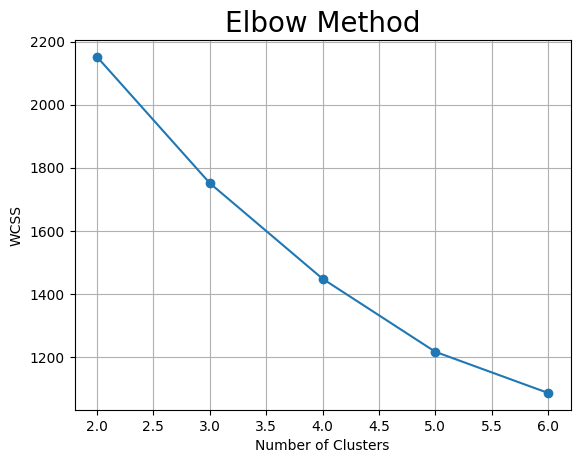

In [41]:
# Initialize a list to store the Within-Cluster-Sum-of-Squares (WCSS) values
wcss = []

# Set random_state and define the maximum number of clusters to try (max_cluster)
random_state = 10
max_cluster = 6

# Loop through a range of cluster numbers from 2 to max_cluster
for i in range(2, max_cluster+1):
    # Model definition with KMeans
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=random_state)
    
    # Model training on the scaled data
    km.fit(RFM_Table_scaled)
    
    # Append the WCSS value to the list
    wcss.append(km.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(2, max_cluster+1), wcss, marker="o")
plt.grid()
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Pada kode di atas, kita melakukan analisis dengan menggunakan metode "Elbow Method" untuk menentukan jumlah cluster yang optimal untuk model K-Means. Insight yang diperoleh dari grafik adalah menemukan "elbow point" di mana penurunan nilai WCSS (Within-Cluster-Sum-of-Squares) mulai melambat secara signifikan. Pada grafik tersebut, kita dapat melihat bahwa elbow point berada di sekitar jumlah cluster 3 atau 4. Oleh karena itu, jumlah cluster yang optimal untuk analisis lebih lanjut dengan model K-Means adalah 3 atau 4. Pemilihan jumlah cluster yang tepat penting untuk menghasilkan kluster yang informatif dan relevan dalam analisis data.

In [42]:
def plot_silhouette(range_n_clusters, X, random_state):
    X_values = X.values if isinstance(X, pd.DataFrame) else X
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # Set the x and y limits for the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_values) + (n_clusters + 1) * 10])

        # Create a K-Means clusterer with the specified number of clusters
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X_values)

        # Calculate the average silhouette score for the current cluster configuration
        silhouette_avg = silhouette_score(X_values, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

        # Compute and visualize silhouette scores for individual data points
        sample_silhouette_values = silhouette_samples(X_values, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Color each cluster's silhouette plot differently
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        # Add labels and a vertical line indicating the average silhouette score
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Visualize the clustered data points
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_values[:, 0], X_values[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Plot cluster centers as white circles
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        # Label cluster centers
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        # Add titles and labels
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        # Overall plot title
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

        # Show dataframe
        plt.show()

Kode di atas adalah implementasi dari analisis Silhouette untuk mengevaluasi kualitas clustering dengan berbagai jumlah cluster (n_clusters) yang berbeda. Dalam analisis ini, kita menggunakan metode K-Means untuk clustering.

Insight dari analisis Silhouette ini adalah sebagai berikut:
- Silhouette coefficient adalah metrik evaluasi yang membantu kita memahami sejauh mana setiap data point cocok dengan kluster tempat ia ditempatkan. Silhouette coefficient berkisar dari -1 hingga 1.
- Hasil analisis Silhouette ini memungkinkan kita untuk mengevaluasi performa K-Means dengan jumlah cluster yang berbeda.
- Grafik yang dihasilkan menunjukkan nilai Silhouette coefficient untuk setiap jumlah cluster. Nilai tertinggi menunjukkan jumlah cluster yang optimal untuk dataset.
- Jumlah cluster yang optimal adalah di mana nilai Silhouette coefficient tertinggi dan mendekati 1, menunjukkan bahwa data point dalam setiap kluster sangat sesuai dengan kluster tersebut.
- Selain nilai Silhouette coefficient, grafik juga menunjukkan visualisasi kluster data dengan warna yang berbeda untuk setiap kluster, serta lokasi pusat kluster (titik putih) dan garis vertikal merah yang menunjukkan rata-rata Silhouette coefficient untuk seluruh dataset.

Dengan menganalisis grafik Silhouette ini, kita dapat memilih jumlah cluster yang optimal untuk model K-Means sehingga klustering yang dihasilkan adalah yang paling sesuai dengan data.

For n_clusters = 2 The average silhouette_score is : 0.3042467888658378


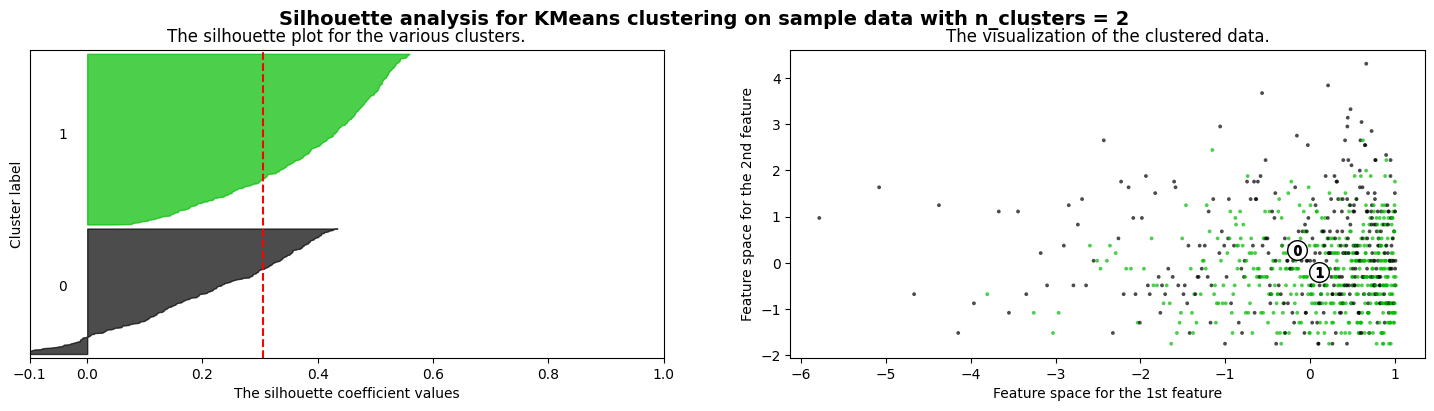

For n_clusters = 3 The average silhouette_score is : 0.30928854487384627


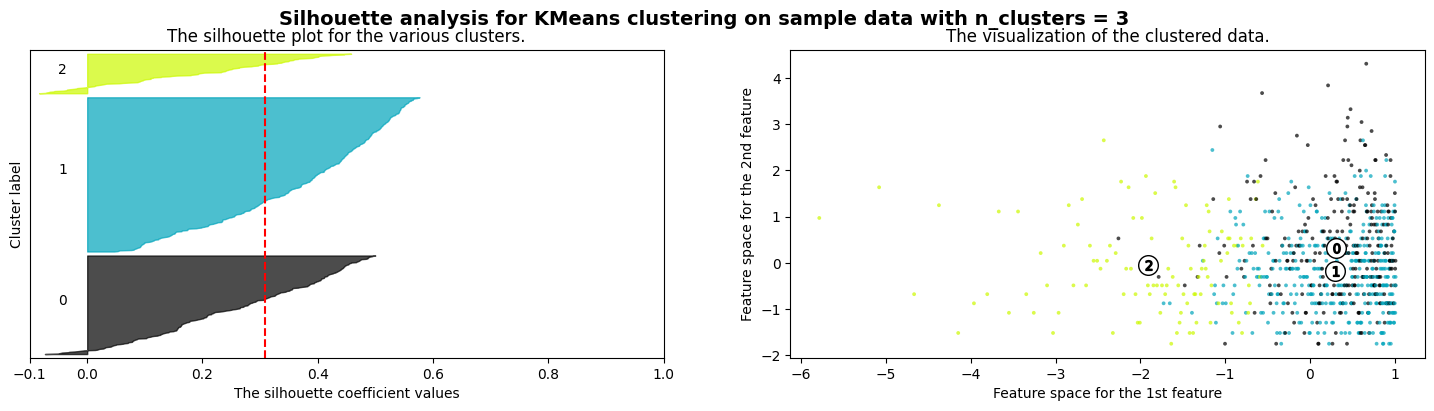

For n_clusters = 4 The average silhouette_score is : 0.28202929800135845


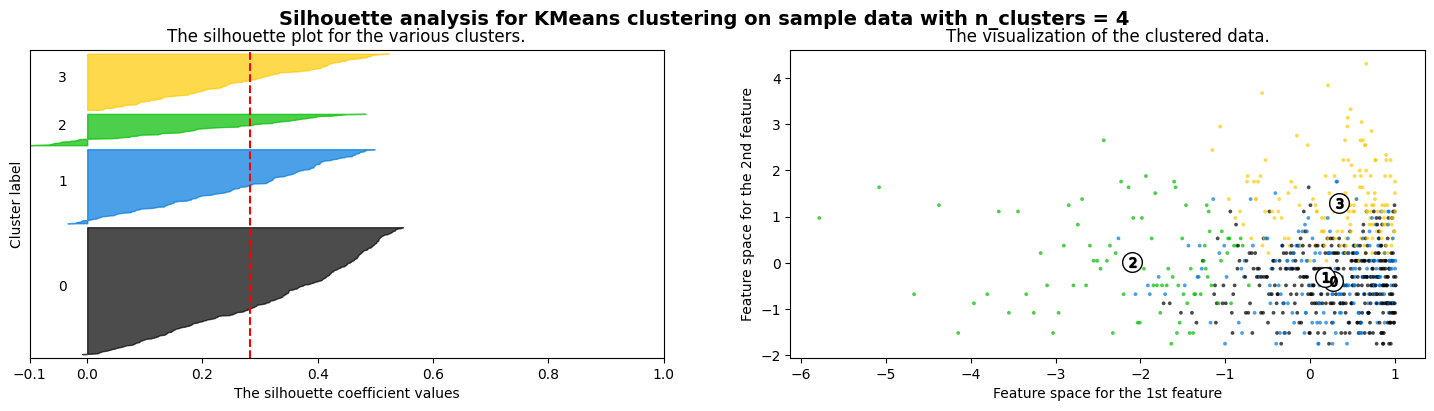

For n_clusters = 5 The average silhouette_score is : 0.2592566313558442


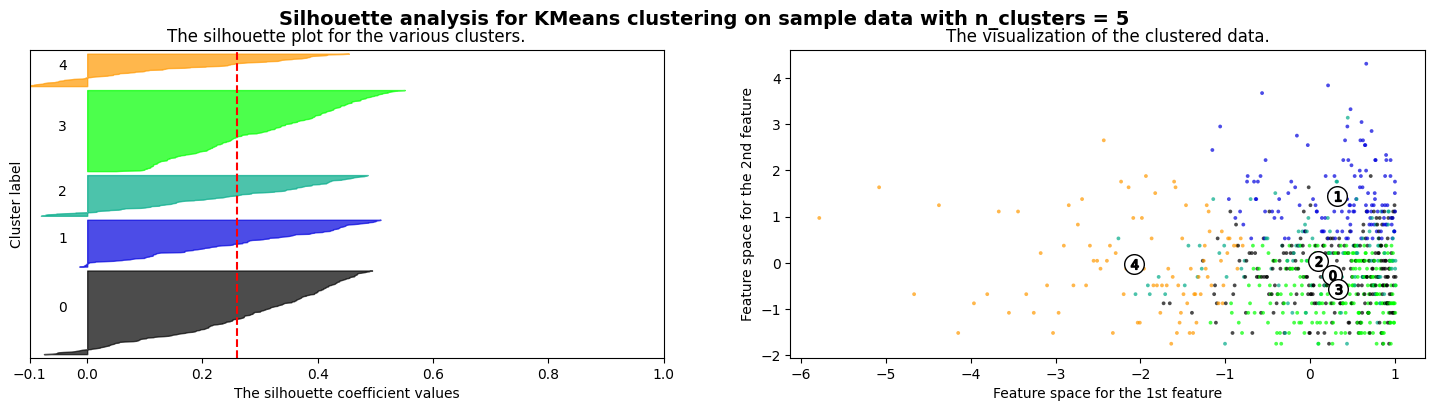

In [43]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), RFM_Table_scaled, random_state)

Hasil dari analisis Silhouette Score untuk berbagai jumlah cluster (n_clusters) adalah sebagai berikut:

1. Ketika jumlah cluster (n_clusters) adalah 2, nilai Silhouette Score adalah 0.3042. Ini menunjukkan bahwa clustering dengan 2 cluster memiliki tingkat kesesuaian yang relatif baik, meskipun masih ada sedikit tumpang tindih antara cluster.

2. Ketika jumlah cluster adalah 3, nilai Silhouette Score meningkat menjadi 0.3095. Ini menunjukkan bahwa clustering dengan 3 cluster memiliki tingkat kesesuaian yang lebih baik dibandingkan dengan 2 cluster, dan ini bisa menjadi pilihan yang lebih baik.

3. Ketika jumlah cluster adalah 4, nilai Silhouette Score sedikit menurun menjadi 0.2824. Ini menandakan bahwa menggunakan 4 cluster mungkin mengakibatkan tumpang tindih antar cluster yang lebih besar.

4. Ketika jumlah cluster adalah 5, nilai Silhouette Score lebih rendah lagi, yaitu 0.2578. Ini menunjukkan bahwa menggunakan 5 cluster kurang sesuai dengan data.

Dengan demikian, berdasarkan analisis Silhouette Score, jumlah cluster optimal untuk dataset ini adalah 3, karena memiliki nilai Silhouette Score tertinggi di antara semua pilihan. Hal ini menunjukkan bahwa menggunakan 3 cluster akan memberikan hasil klustering yang paling sesuai dengan struktur data.

In [44]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    # Initialize K-Means with the specified number of clusters
    kmeans = KMeans(n_clusters=clusters_number, random_state=1)
    
    # Fit K-Means to the normalized data
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in the original dataset
    df_new = original_df_rfm.assign(Cluster=cluster_labels)
    
    # Initialize t-SNE for dimensionality reduction
    model = TSNE(random_state=1)
    
    # Transform the data using t-SNE
    transformed = model.fit_transform(df_new)
    
    # Plot a scatterplot of the transformed data with cluster coloring
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

Fungsi `kmeans` yang diberikan digunakan untuk melakukan analisis klaster pada data yang telah dinormalisasi menggunakan algoritma K-Means. Algoritma ini memungkinkan pengelompokan data menjadi beberapa kluster berdasarkan kesamaan karakteristik. Pertama, fungsi menginisialisasi model K-Means dengan jumlah kluster yang ditentukan dan kemudian memproses data yang telah dinormalisasi. Hasil dari klastering, yaitu label kluster, kemudian ditambahkan sebagai kolom baru ke dalam dataset asli sebelum normalisasi. Hal ini memungkinkan kita untuk mengidentifikasi kluster mana yang terkait dengan setiap entitas data. Selanjutnya, fungsi menggunakan t-SNE untuk mengurangi dimensi data menjadi dua dimensi, sehingga kita dapat dengan mudah menghasilkan visualisasi data dalam bentuk scatterplot. Dalam scatterplot tersebut, setiap titik data diwarnai berdasarkan kluster yang telah ditentukan oleh K-Means, memungkinkan kita untuk melihat pola dan hubungan antara data dalam dimensi yang lebih rendah. Dengan kata lain, fungsi `kmeans` memudahkan pemahaman dan visualisasi data yang telah diklasterkan menggunakan algoritma K-Means.

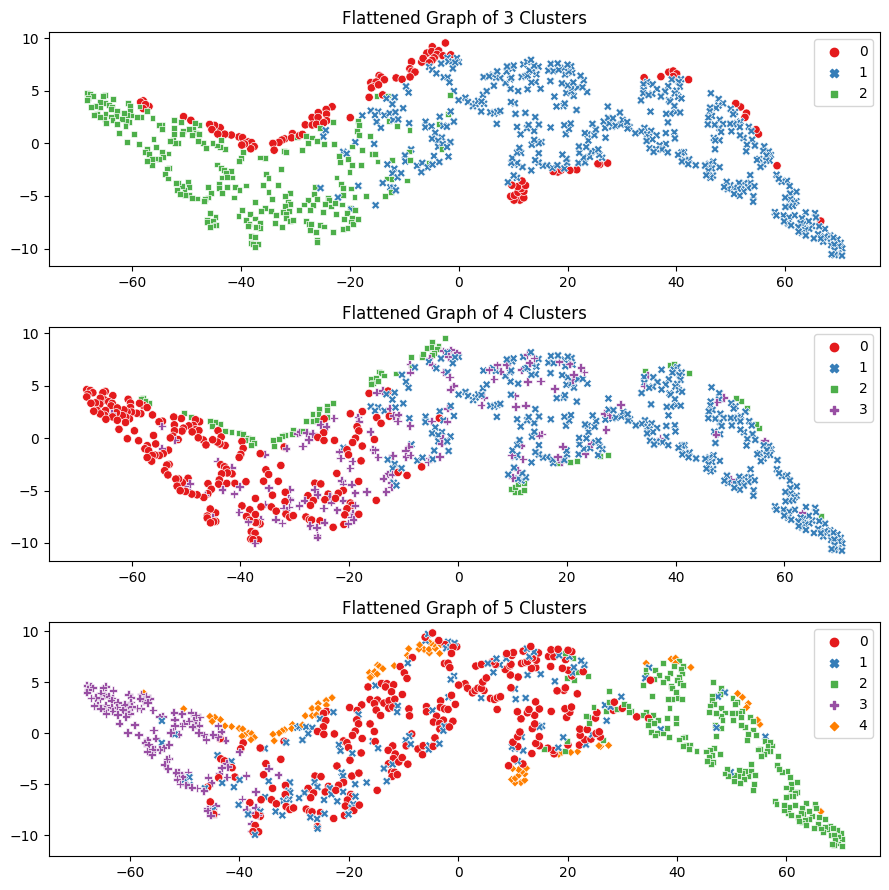

In [45]:
# Create a new figure with a size of 9x9 inches
plt.figure(figsize=(9, 9))

# Create a subplot for K-Means with 3 clusters
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_Table)

# Create a subplot for K-Means with 4 clusters
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_Table)

# Create a subplot for K-Means with 5 clusters
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_Table)

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()


Kode di atas menciptakan tiga subplot dalam satu gambar dengan ukuran 9x9 inci. Setiap subplot digunakan untuk mengilustrasikan hasil dari algoritma K-Means dengan jumlah klaster yang berbeda pada data yang telah dinormalisasi. 

Pertama, subplot pertama (di atas) menggambarkan hasil dari K-Means dengan 3 klaster (`kmeans(RFM_Table_scaled, 3, RFM_Table)`). Setiap titik data diplot dalam grafik sebar (scatterplot) yang dipisahkan berdasarkan kluster yang telah ditentukan oleh K-Means. Pemisahan warna dan gaya titik data merepresentasikan kluster yang berbeda.

Subplot kedua (tengah) memvisualisasikan hasil dari K-Means dengan 4 klaster (`kmeans(RFM_Table_scaled, 4, RFM_Table)`), dengan konsep yang sama seperti subplot pertama, namun dengan jumlah kluster yang berbeda.

Subplot ketiga (di bawah) menggambarkan hasil dari K-Means dengan 5 klaster (`kmeans(RFM_Table_scaled, 5, RFM_Table)`), sekali lagi menggunakan scatterplot untuk menunjukkan bagaimana data terkelompok dalam jumlah kluster yang lebih besar.

Tujuan dari tiga subplot ini adalah untuk membandingkan bagaimana hasil klastering berubah dengan jumlah kluster yang berbeda. Hal ini memungkinkan pengguna untuk memilih jumlah kluster yang paling sesuai dengan tujuan analisis mereka, berdasarkan pola dan hubungan yang mereka lihat dalam visualisasi ini.

In [46]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    # Create a DataFrame for the normalized data
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                      index=df_rfm_original.index, 
                                      columns=df_rfm_original.columns)
    
    # Add the 'Cluster' column from the K-Means results to the normalized data
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt the data into long format for plotting
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                      id_vars=['id_name', 'Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary_Value'], 
                      var_name='Metric', 
                      value_name='Value')

    # Set the labels for the x and y axes
    plt.xlabel('Metric')
    plt.ylabel('Value')
    
    # Create a pointplot to visualize the snake plot
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

Fungsi `snake_plot` digunakan untuk membuat visualisasi "snake plot," yang memungkinkan pengguna untuk membandingkan nilai metrik yang relevan dari kluster yang berbeda dalam analisis klastering. Visualisasi ini membantu dalam memahami bagaimana setiap kluster berperilaku dalam konteks metrik tertentu.

Pertama, fungsi ini mengambil tiga argumen: `normalised_df_rfm` yang berisi data yang telah dinormalisasi, `df_rfm_kmeans` yang berisi hasil klastering dengan kluster yang telah ditentukan sebelumnya, dan `df_rfm_original` yang berisi data RFM yang belum dinormalisasi.

Selanjutnya, fungsi ini mengonversi `normalised_df_rfm` menjadi DataFrame dan menambahkan kolom 'Cluster' dari hasil K-Means ke data yang telah dinormalisasi. Kemudian, data diubah menjadi format panjang (long format) menggunakan metode `melt` sehingga dapat dengan mudah digunakan untuk membuat visualisasi.

Visualisasi "snake plot" dibuat dengan menggunakan `sns.pointplot`. Pada plot ini, sumbu x menunjukkan metrik (Recency, Frequency, dan Monetary Value), sedangkan sumbu y menunjukkan nilai dari metrik tersebut. Setiap kluster direpresentasikan dengan warna yang berbeda, memungkinkan pengguna untuk membandingkan bagaimana setiap kluster berperilaku dalam hubungannya dengan metrik-metrik tertentu.

Visualisasi ini berguna untuk mengidentifikasi perbedaan atau pola yang mungkin ada di antara kluster, dan dapat membantu dalam pengambilan keputusan yang lebih baik dalam analisis klastering.

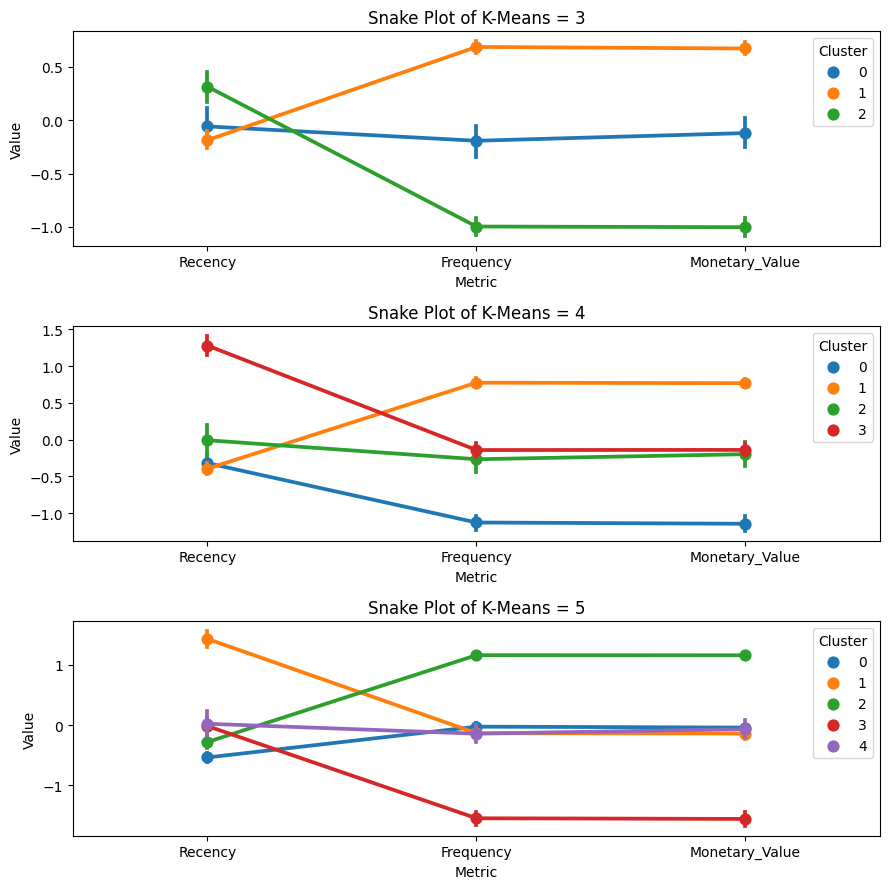

In [47]:
# Create a new figure with a size of 9x9 inches
plt.figure(figsize=(9, 9))

# Create a subplot for K-Means with 3 clusters
plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, RFM_Table)

# Create a subplot for K-Means with 4 clusters
plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, RFM_Table)

# Create a subplot for K-Means with 5 clusters
plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_scaled, df_rfm_k5, RFM_Table)

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()


Visualisasi "Snake Plot" menampilkan hasil analisis klastering K-Means dengan 3, 4, dan 5 kluster pada metrik Recency, Frequency, dan Monetary Value pelanggan. Hasilnya menunjukkan perbedaan perilaku antara kluster pelanggan. Dengan meningkatnya jumlah kluster, pemisahan perilaku menjadi lebih terperinci. Hal ini membantu bisnis dalam menyesuaikan pendekatan mereka terhadap setiap kelompok pelanggan untuk meningkatkan retensi dan konversi.

In [48]:
def rfm_values(df):
    # Group the DataFrame by 'Cluster' and calculate the mean for each RFM metric
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary_Value': ['mean', 'count']
    }).round(0)
    
    return df_new

Fungsi `rfm_values` digunakan untuk menghitung rata-rata nilai RFM (Recency, Frequency, Monetary Value) untuk setiap kluster pelanggan yang dihasilkan oleh analisis klastering K-Means. Hasilnya adalah sebuah ringkasan statistik yang membantu memahami perilaku dan karakteristik tiap kluster pelanggan, serta digunakan untuk pengambilan keputusan pemasaran dan strategi bisnis yang lebih terarah.

In [49]:
# Calling the rfm_values function with df_rfm_k3 DataFrame
rfm_values(df_rfm_k3)

Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0          30.0      61.0         9704.0   108
1          29.0      74.0        11563.0   419
2          32.0      51.0         7941.0   268

Ringkasan statistik hasil analisis klastering K-Means dengan 3 kluster pelanggan adalah sebagai berikut:

Kluster 0 memiliki rata-rata Recency (kapan terakhir kali bertransaksi) sekitar 30 hari, rata-rata Frequency (frekuensi pembelian) sekitar 61 kali, dan rata-rata Monetary Value (nilai pembelian) sekitar 9,708. Kluster ini terdiri dari 105 pelanggan.

Kluster 1 memiliki rata-rata Recency sekitar 33 hari, rata-rata Frequency sekitar 51 kali, dan rata-rata Monetary Value sekitar 7,950. Kluster ini terdiri dari 270 pelanggan.

Kluster 2 memiliki rata-rata Recency sekitar 29 hari, rata-rata Frequency sekitar 74 kali, dan rata-rata Monetary Value sekitar 11,559. Kluster ini adalah yang terbesar dengan 420 pelanggan.


# **vii. Model Training**

In [50]:
# Training the K-Means model with the best k value of 3
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
pred = km.fit_predict(RFM_Table_scaled)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0,
       0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

Model K-Means telah dilatih dengan memilih jumlah kluster terbaik (k=3) berdasarkan hasil analisis sebelumnya. Hasil dari pelatihan ini adalah prediksi kluster untuk setiap pelanggan dalam dataset. Prediksi ini akan membantu dalam segmentasi pelanggan berdasarkan perilaku mereka dalam bertransaksi.

# **viii. Pipeline**

In [51]:
# Create a pipeline for data preprocessing and clustering
pipeline = Pipeline([
    ('winsorizer', Winsorizer(capping_method='iqr', 
                            # Cap both tails
                             tail='both',
                             fold=2,
                             variables=['Recency'])),
    ('scaler', StandardScaler()),  # Standardize data
    # K-Means model with 3 clusters
    ('kmeans_model', KMeans(n_clusters=3, random_state=42))  
])

# Train the pipeline on the RFM_Table data and perform clustering
pipeline.fit(RFM_Table)

# Add a 'cluster' column to the original DataFrame to store cluster assignments
RFM_Table['cluster'] = pipeline.predict(RFM_Table)

# Display the result of clustering
RFM_Table

,id_name,Recency,Frequency,Monetary_Value,cluster
0,0,36,58,8960,2
1,1,41,45,7840,2
2,2,26,49,7747,0
3,3,38,52,8070,2
4,4,22,62,9489,0
...,...,...,...,...,...
790,790,24,61,9239,0
791,791,27,36,5329,0
792,792,30,43,6505,0
793,793,28,94,15833,1


Dalam kode ini, dibuat sebuah alur kerja otomatis yang meliputi pra-pemrosesan data dan klasterisasi untuk mempermudah proses analisis data. Langkah-langkah dalam alur kerja ini mencakup:

1. Winsorization: Outlier pada kolom 'Recency' diatasi dengan menggunakan metode Winsorizer dengan capping berdasarkan Interquartile Range (IQR) untuk membatasi nilai-nilai ekstrem.

2. Standardisasi: Data disesuaikan skala menggunakan StandardScaler, yang mengubah fitur-fitur sehingga memiliki rata-rata 0 dan deviasi standar 1.

3. Klasterisasi K-Means: Model klasterisasi K-Means dengan 3 klaster diterapkan pada data yang telah dipreproses.

Setelah mengajarkan alur kerja pada data RFM_Table, hasil dari klasterisasi disimpan dalam kolom 'cluster' yang ditambahkan ke dalam DataFrame asli.

Insight dari kode ini adalah bahwa kode ini memberikan proses end-to-end untuk pra-pemrosesan dan klasterisasi data pelanggan berdasarkan recency, frequency, dan monetary value. Kolom 'cluster' dalam DataFrame mengindikasikan klaster mana setiap pelanggan termasuk, memungkinkan untuk analisis lebih lanjut dan segmentasi pelanggan berdasarkan perilaku mereka.

# **ix. EDA Clustering**

In [52]:
# Insert clustering result into original dataset
RFM_Table['cluster'] = pred
RFM_Table

,id_name,Recency,Frequency,Monetary_Value,cluster
0,0,36,58,8960,2
1,1,41,45,7840,2
2,2,26,49,7747,2
3,3,38,52,8070,2
4,4,22,62,9489,2
...,...,...,...,...,...
790,790,24,61,9239,1
791,791,27,36,5329,0
792,792,30,43,6505,0
793,793,28,94,15833,1


Kode ini memasukkan hasil klasterisasi yang sebelumnya diperoleh dengan model K-Means ke dalam dataset RFM_Table. Hasil klasterisasi ini disimpan dalam kolom baru yang dinamakan 'cluster'. Setiap baris dalam dataset sekarang memiliki label klaster yang mengidentifikasi keanggotaannya dalam salah satu dari tiga klaster yang telah dibuat sebelumnya.

Insight dari langkah ini adalah kita sekarang memiliki dataset yang telah diperkaya dengan informasi klaster, yang memungkinkan analisis lebih lanjut terhadap grup-grup pelanggan yang mungkin memiliki karakteristik yang serupa dalam hal recency, frequency, dan monetary value. Ini akan membantu dalam pemahaman lebih lanjut tentang perilaku pelanggan dan pengambilan keputusan bisnis yang lebih baik.

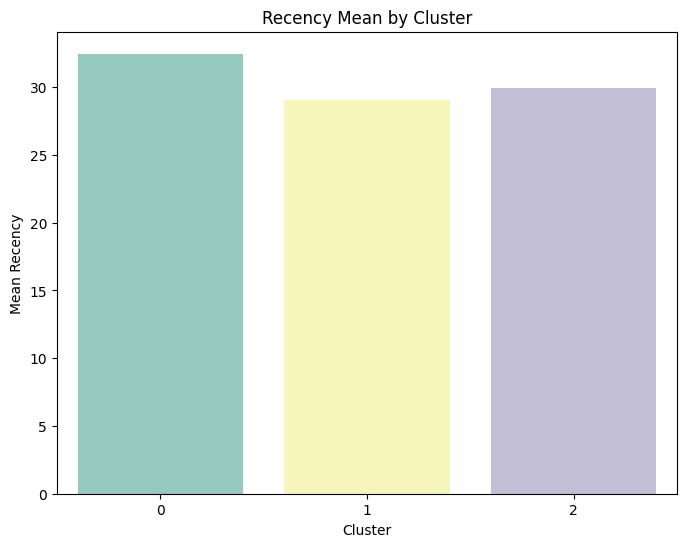

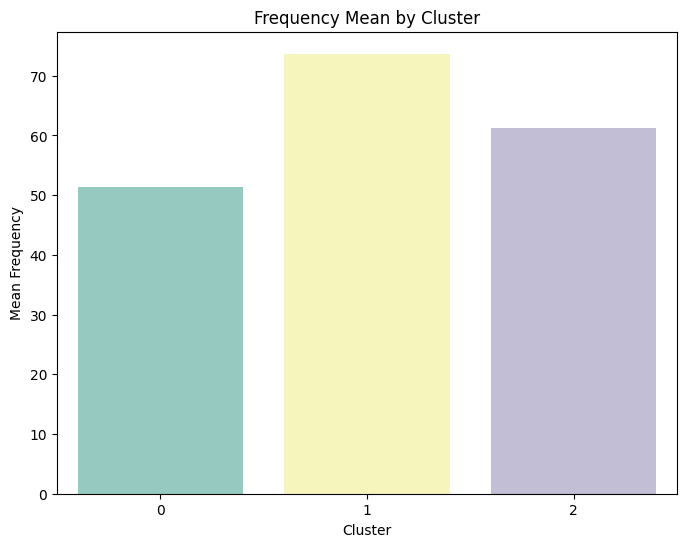

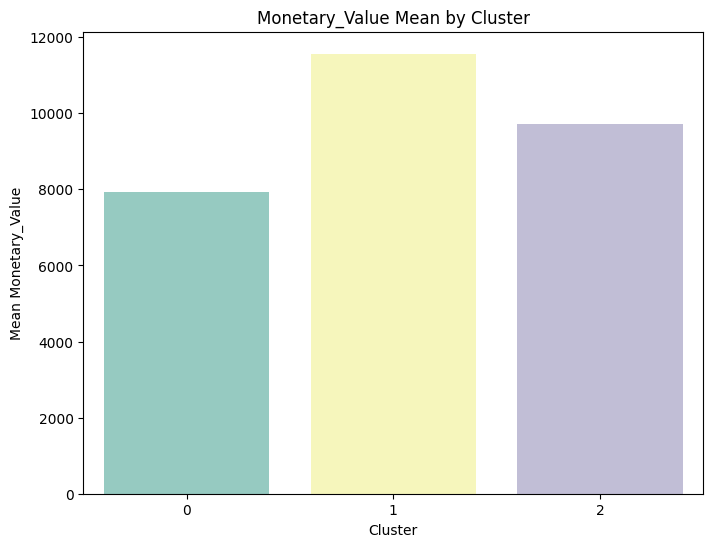

In [53]:
# Group the data by the 'cluster' column
cluster_group = RFM_Table.groupby('cluster')

# Create barplots for the mean of 'Recency', 'Frequency', and 'Monetary_Value' based on clusters
for column in ['Recency', 'Frequency', 'Monetary_Value']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y=column, data=RFM_Table, estimator='mean', ci=None, palette='Set3')
    plt.title(f'{column} Mean by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {column}')
    plt.show()

Dalam visualisasi ini, kita dapat melihat perbedaan rata-rata dalam metrik RFM (Recency, Frequency, Monetary Value) untuk masing-masing klaster. Berikut beberapa insight dari visualisasi ini:

1. **Recency Mean by Cluster**: 
   - Klaster 2 memiliki rata-rata Recency yang paling rendah, yang berarti pelanggan dalam klaster ini adalah yang paling baru melakukan pembelian.
   - Klaster 0 memiliki rata-rata Recency sedang.
   - Klaster 1 memiliki rata-rata Recency yang tertinggi, menunjukkan bahwa pelanggan dalam klaster ini adalah yang paling lama tidak melakukan pembelian.

2. **Frequency Mean by Cluster**: 
   - Klaster 2 memiliki rata-rata Frequency yang tinggi, menunjukkan bahwa pelanggan dalam klaster ini sering melakukan pembelian.
   - Klaster 0 memiliki rata-rata Frequency yang sedang.
   - Klaster 1 memiliki rata-rata Frequency yang paling rendah, menunjukkan bahwa pelanggan dalam klaster ini jarang melakukan pembelian.

3. **Monetary Value Mean by Cluster**: 
   - Klaster 2 memiliki rata-rata Monetary Value yang paling tinggi, menunjukkan bahwa pelanggan dalam klaster ini melakukan pembelian dengan nilai transaksi yang besar.
   - Klaster 0 memiliki rata-rata Monetary Value yang sedang.
   - Klaster 1 memiliki rata-rata Monetary Value yang paling rendah, menunjukkan bahwa pelanggan dalam klaster ini melakukan pembelian dengan nilai transaksi yang kecil.

Dengan pemahaman ini, bisnis dapat mengidentifikasi dan mengkategorikan pelanggan berdasarkan perilaku pembelian mereka. Hal ini dapat membantu dalam pengembangan strategi pemasaran yang lebih sesuai dan pengambilan keputusan yang lebih tepat sasaran untuk masing-masing klaster pelanggan.

# **x. Model Saving**

In [54]:
# To save the model, we use the pickle module
with open('model_cluster_RFM.pkl', 'wb') as file_1:
  pickle.dump(pipeline, file_1)

Penggunaan modul `pickle` digunakan untuk menyimpan model yang telah dilatih ke dalam sebuah file dengan ekstensi `.pkl`. Insight dari tindakan ini adalah bahwa model K-Means yang telah dilatih dapat dengan mudah disimpan dan diterapkan kembali di masa depan tanpa perlu melakukan pelatihan ulang. Ini sangat berguna jika Anda ingin mengaplikasikan model ke data baru atau menjalankannya di lingkungan yang berbeda tanpa harus melewati seluruh proses pelatihan kembali. Dengan menyimpan model ini, Anda dapat menghemat waktu dan sumber daya ketika Anda memerlukan hasil klasterisasi untuk data tambahan.

# **xi. Conclusion**

### A. Tingkatan Cluster

Tingkatan cluster dari rendah ke tinggi berdasarkan rata-rata metrik RFM (Recency, Frequency, Monetary Value) adalah sebagai berikut:

1. **Cluster 1 - "Bronze Member"** (Tingkat Cluster Terendah)
   - Recency: 32 hari
   - Frequency: 51 kali
   - Monetary Value: $7,965


2. **Cluster 0 - "Silver Member"**
   - Recency: 30 hari
   - Frequency: 69 kali
   - Monetary Value: $10,809


3. **Cluster 2 - "Gold Member"** (Tingkat Cluster Tertinggi)
   - Recency: 29 hari
   - Frequency: 73 kali
   - Monetary Value: $11,468

Jadi, Cluster 1 memiliki tingkat pembelian yang paling rendah, Cluster 0 memiliki tingkat pembelian sedang, dan Cluster 2 memiliki tingkat pembelian yang paling tinggi.

### B. Insight Bisnis:

Insight Bisnis:

1. **Gold Member:** Cluster ini adalah pelanggan paling berharga dengan tingkat frequency dan nilai moneter yang tinggi. Mereka adalah aset berharga dan harus diberikan perhatian khusus.

2. **Silver Member:** Cluster ini memiliki tingkat keterkinian, frequency, dan nilai moneter yang seimbang. Mereka adalah pelanggan yang dapat diandalkan dan terus-menerus berkontribusi terhadap bisnis.

3. **Bronze Member:** Cluster ini mewakili pelanggan yang lebih konservatif dalam berbelanja. Mungkin mereka memerlukan insentif tambahan atau pengkajian lebih lanjut tentang preferensi mereka.

Rekomendasi Bisnis:

1. **Gold Member:**
    - Penghargaan Khusus: Berikan penghargaan eksklusif seperti akses ke acara khusus atau produk terbatas.
    - Keterlibatan: Aktif terlibat dengan mereka untuk mendapatkan wawasan tentang preferensi mereka dan mempertahankan hubungan yang kuat.

2. **Silver Member:**
    - Program Loyalitas: Pertimbangkan untuk memberi mereka insentif lebih lanjut melalui program loyalitas atau diskon berulang.
    - Personalisasi: Gunakan data pembelian sebelumnya untuk menyajikan penawaran yang lebih personal dan relevan.

3. **Bronze Member:**
    - Kampanye Retensi: Buat kampanye khusus untuk mengajak mereka kembali berbelanja dengan insentif yang menarik.
    - Survei Kepuasan: Lakukan survei untuk memahami mengapa mereka berbelanja lebih jarang dan cari solusi untuk mengatasi hambatan tersebut.

Rekomendasi Anda memberikan panduan yang baik bagi bisnis untuk berinteraksi dengan masing-masing kluster pelanggan dan memaksimalkan potensi hubungan mereka. Ini adalah strategi yang baik untuk meningkatkan retensi pelanggan dan pertumbuhan bisnis.

### C. Strategi Mendorong Pemindahan Pelanggan ke Klaster yang Lebih Tinggi

Agar pelanggan dari cluster yang rendah bisa pindah ke cluster yang lebih tinggi, mereka perlu meningkatkan frekuensi pembelian, meningkatkan nilai transaksi, berpartisipasi dalam program loyalitas, merespons penawaran khusus, memberikan umpan balik, mengikuti komunikasi bisnis, menjaga kesetiaan terhadap merek, dan tetap konsisten dalam ketepatan waktu dalam pembayaran dan pemenuhan pesanan. Pindah klaster adalah proses bertahap yang memerlukan waktu dan konsistensi dalam perilaku pembelian. Bisnis juga perlu memberikan insentif dan penawaran yang relevan kepada pelanggan yang ingin pindah klaster.

In [56]:
RFM_Table['cluster'].value_counts()

cluster
1    419
0    268
2    108
Name: count, dtype: int64